# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

In [98]:
import pandas as pd
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'], index_col='date_time')
#
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [99]:
df = df.sort_values(by='date_time')
# df = df.set_index('date_time')

In [100]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [101]:
df.dropna(inplace=True)

In [102]:
df.duplicated().sum()

18

In [103]:
df.drop_duplicates(inplace=True)

In [104]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


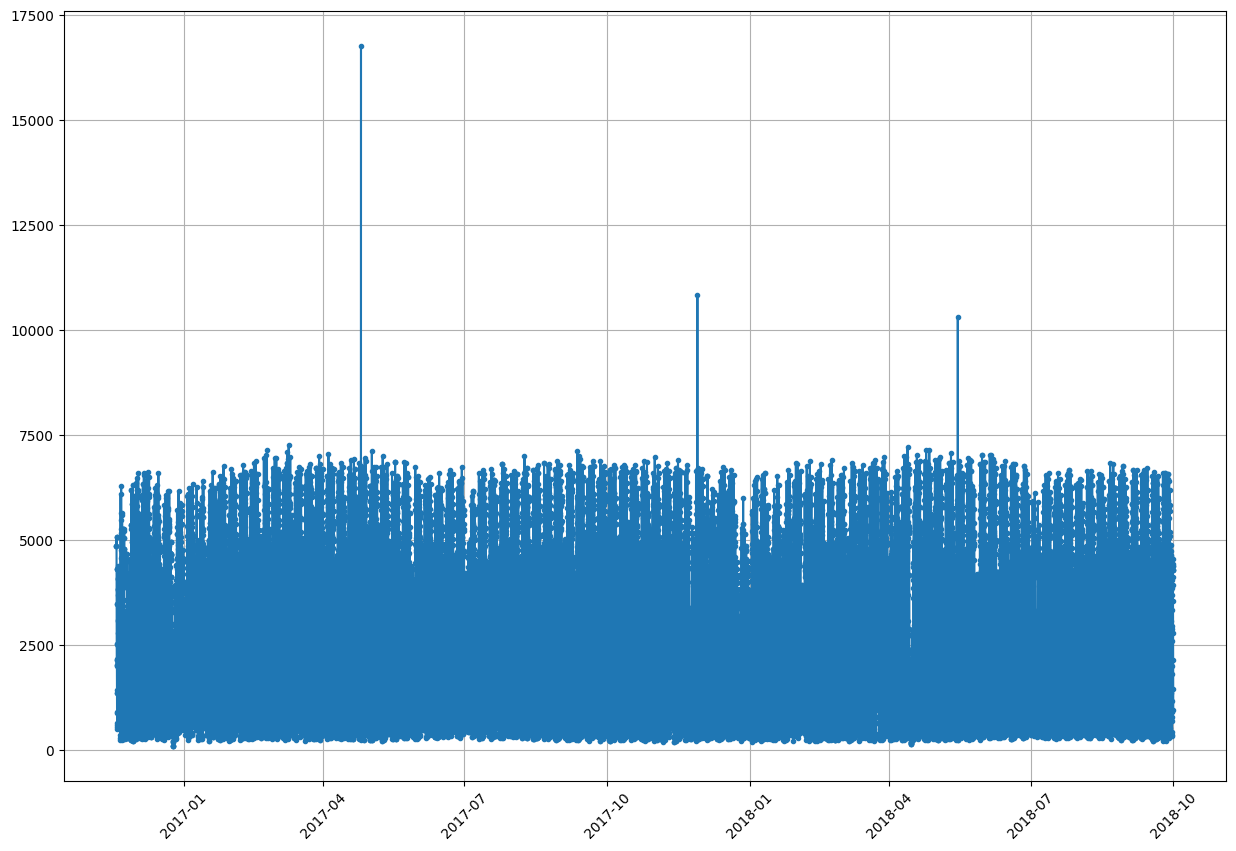

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.plot(df.index,df['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.grid(True)

In [106]:
col_num = df.select_dtypes(include=['number']).columns
col_cat = df.select_dtypes(include=['object']).columns

<Axes: ylabel='Frequency'>

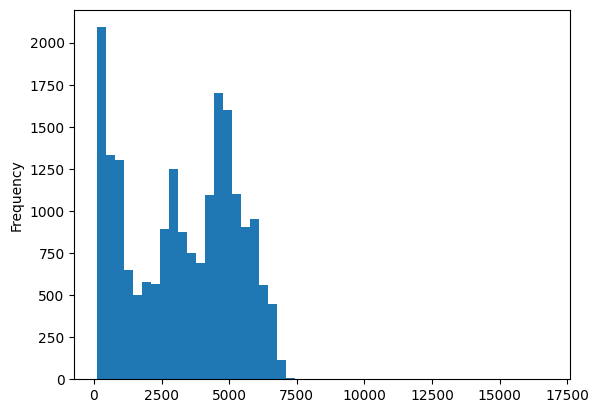

In [107]:
df['traffic_volume'].plot.hist(bins=50)

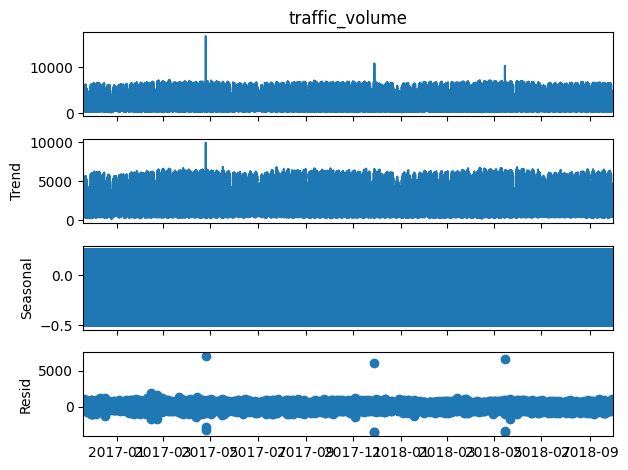

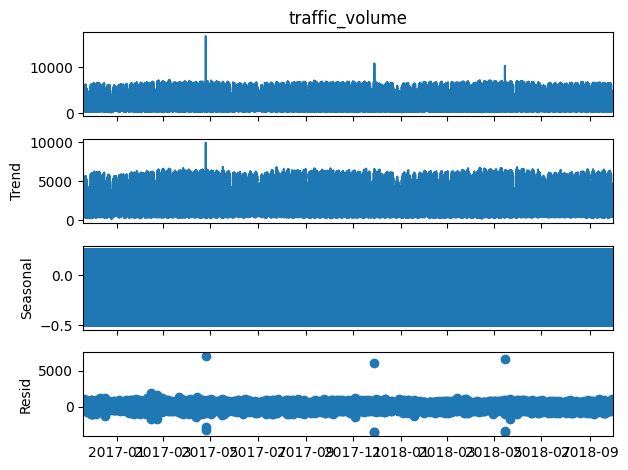

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['traffic_volume'], model='additive', period=3).plot()

In [110]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist


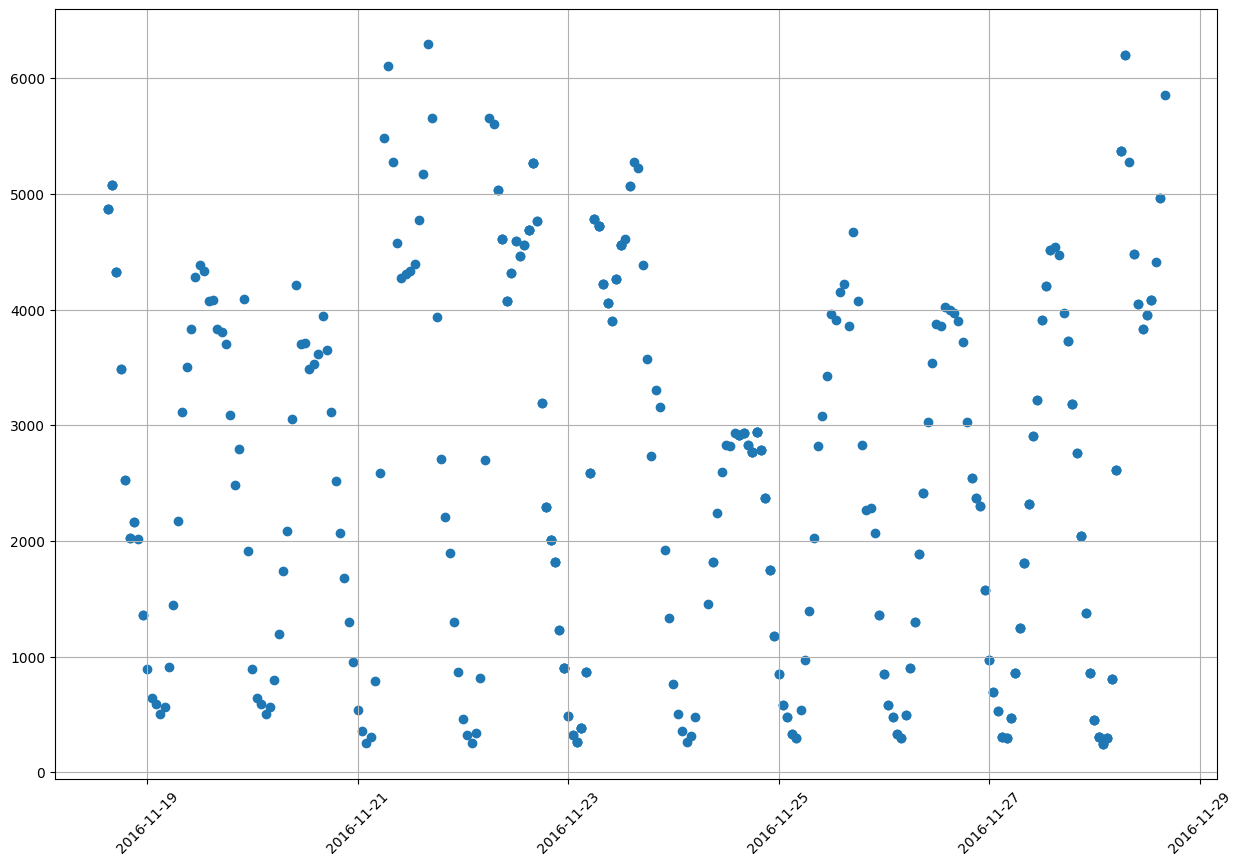

In [111]:
df_spocific = df.iloc[:400]
plt.figure(figsize=(15,10))
plt.scatter(df_spocific.index,df_spocific['traffic_volume'])
plt.xticks(rotation=45)
plt.grid(True)

<Axes: >

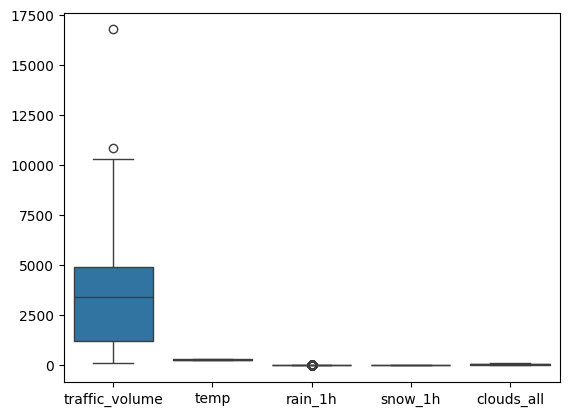

In [112]:
sns.boxplot(data=df[col_num])

In [113]:
import numpy as np

def remove_outliers(df, column):
    if df[column].dtype in [np.int64, np.float64]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        return df
for i in df.columns:
    df = remove_outliers(df, i)

<Axes: >

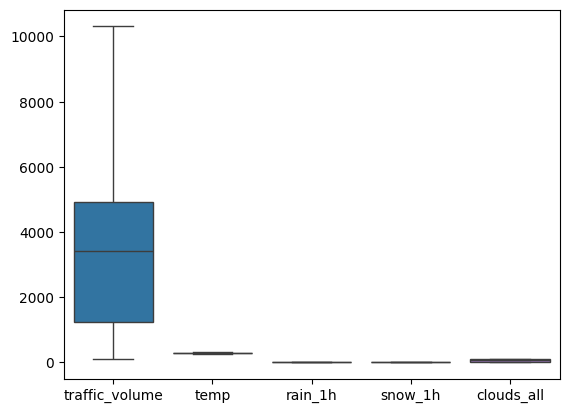

In [114]:
sns.boxplot(data=df[col_num])

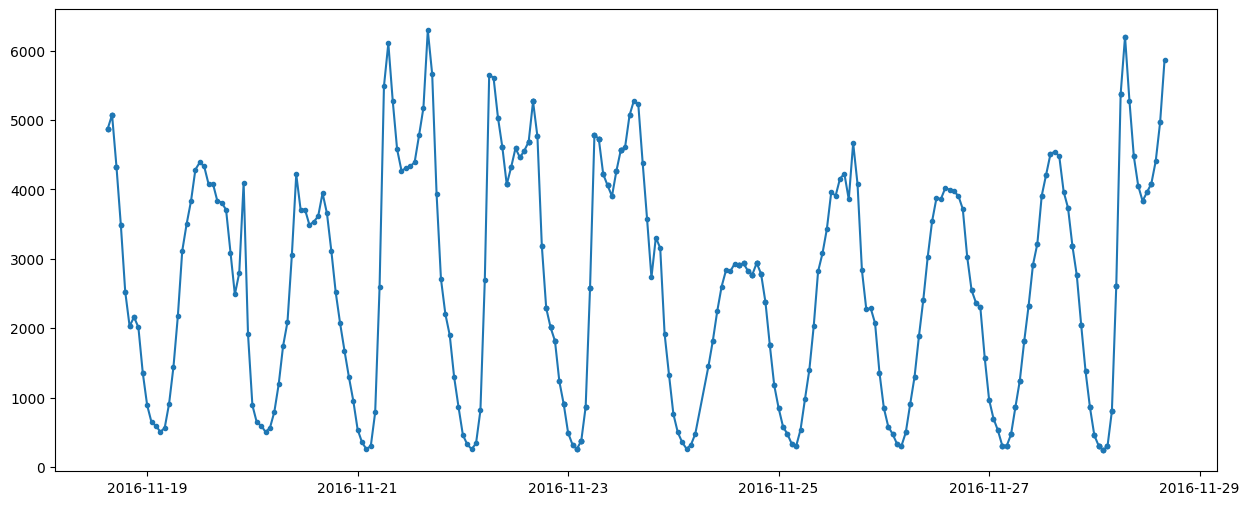

In [115]:
df_specific = df.iloc[:400]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show() # we notice there is a weekly pattern

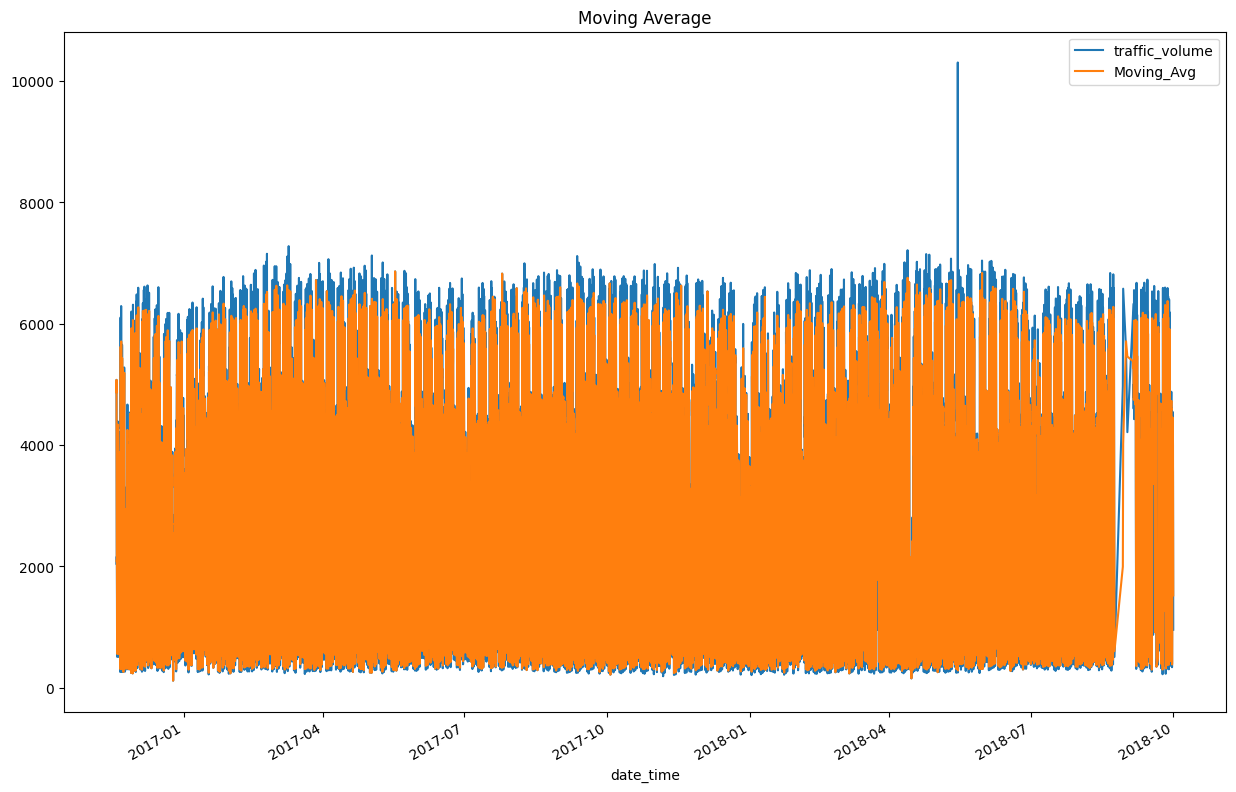

In [116]:
df['Moving_Avg'] = df['traffic_volume'].rolling(window=3).mean()
df[['traffic_volume', 'Moving_Avg']].plot(figsize=(15, 10))
plt.title('Moving Average')
plt.show()

<Axes: xlabel='date_time'>

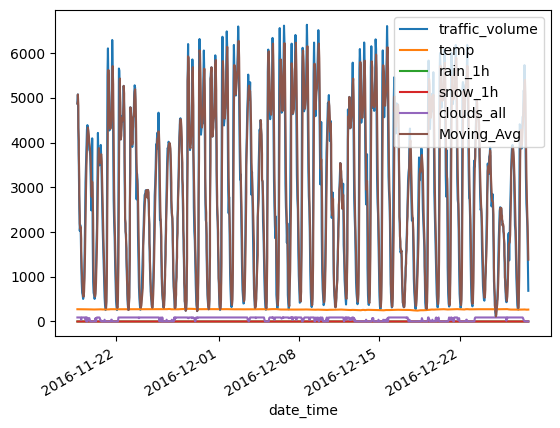

In [117]:
df['2016-11-18 15:00':'2016-12-28 00:00'].plot()

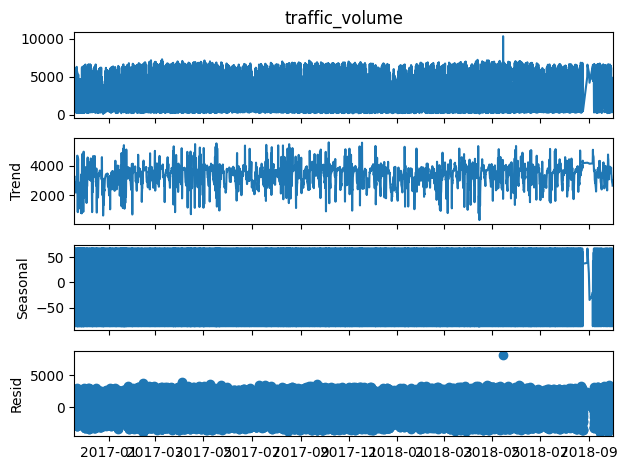

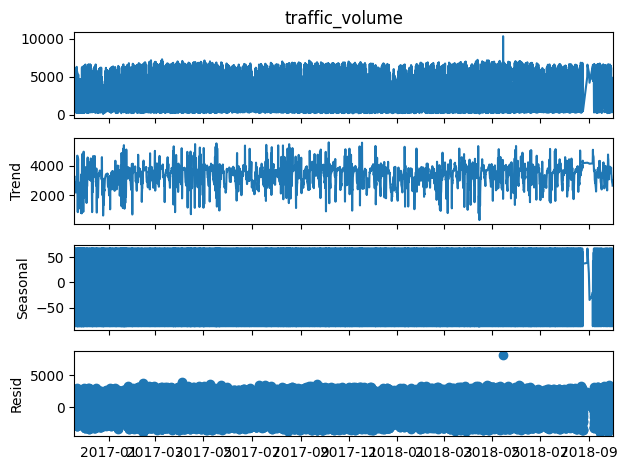

In [118]:
seasonal_decompose(df['traffic_volume'], model='additive', period=24).plot()


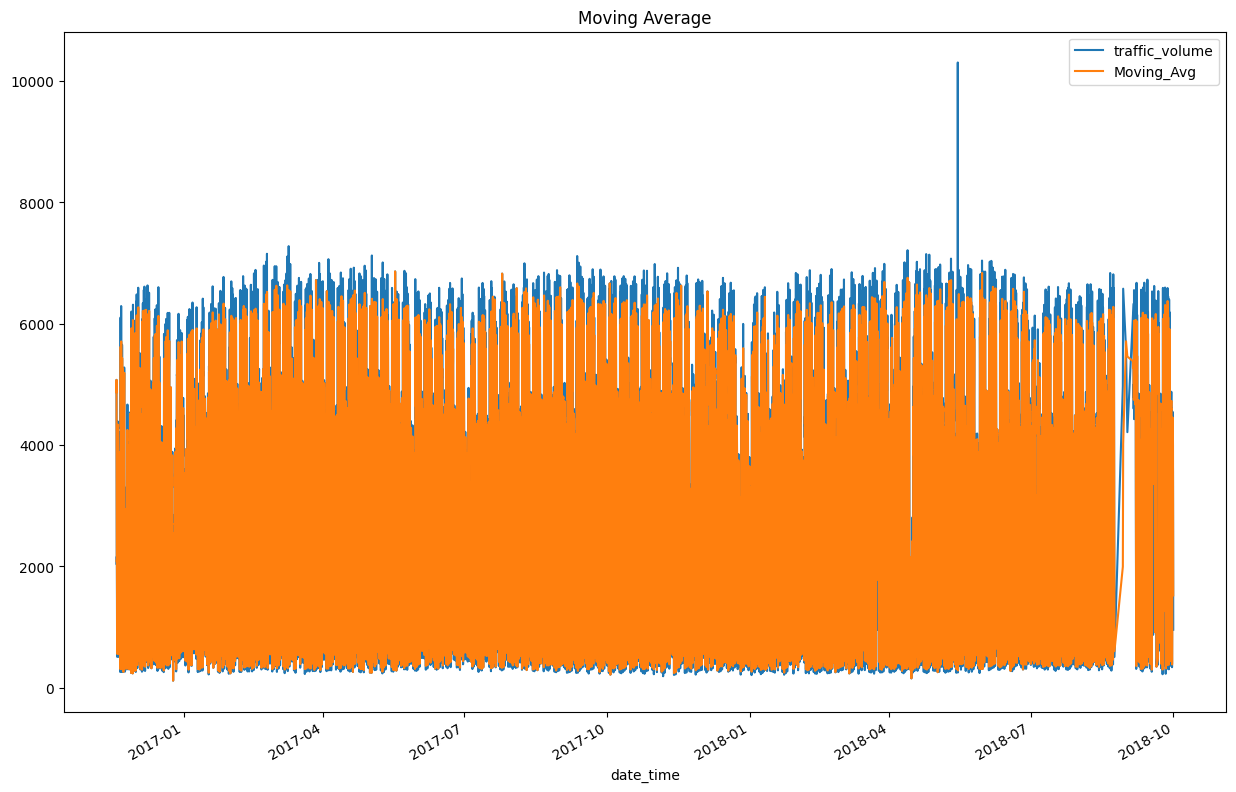

In [119]:
df['Moving_Avg'] = df['traffic_volume'].rolling(window=3).mean()
df[['traffic_volume', 'Moving_Avg']].plot(figsize=(15, 10))
plt.title('Moving Average')
plt.show()

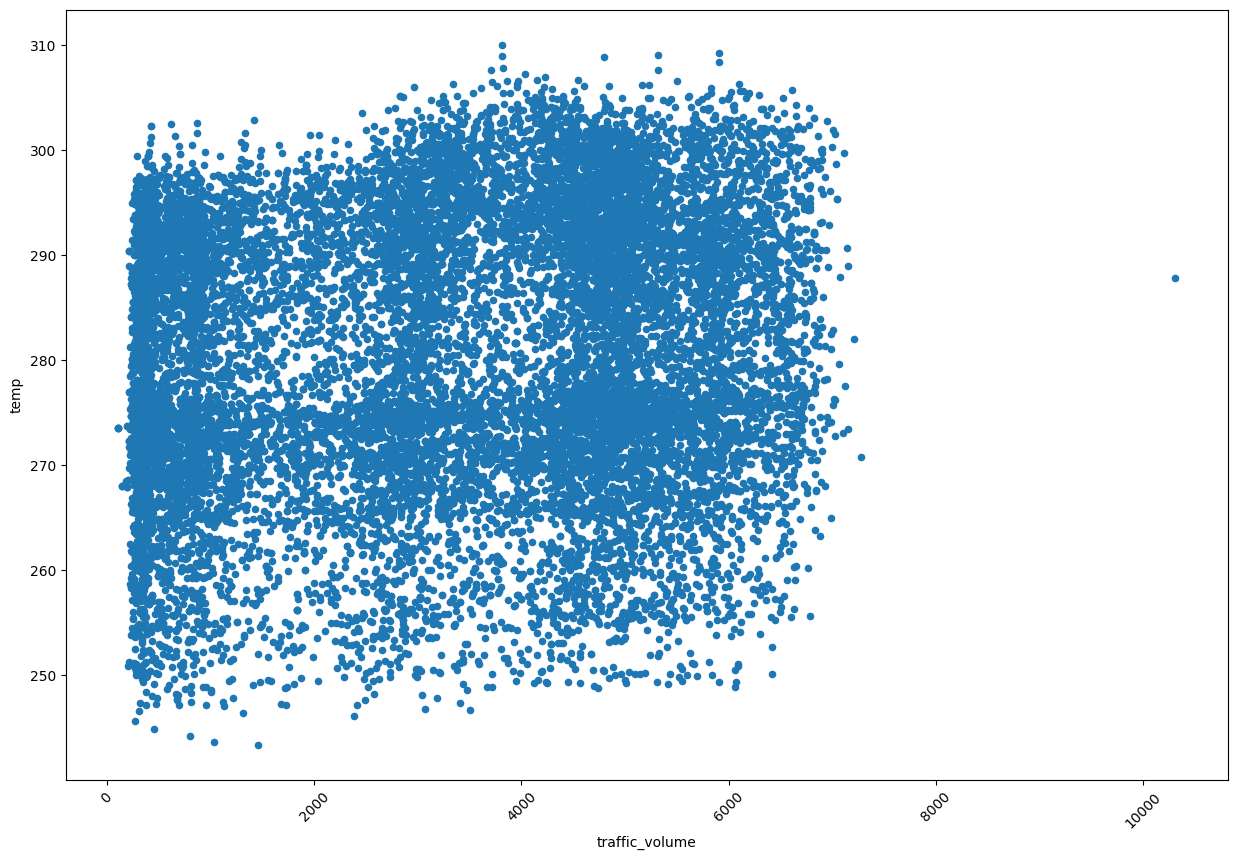

In [120]:
df.plot(kind='scatter', x='traffic_volume', y='temp', figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

In [121]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.000000
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4939.333333
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5006.666667


In [122]:
df['rain_1h'].value_counts()

,count
rain_1h,
0.0,19247


In [123]:
df['snow_1h'].value_counts()

,count
snow_1h,
0.0,19247


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [124]:
# we did that above Handle any missing values in the dataset.

In [125]:
# we did that above If necessary, resample the data to ensure consistent time intervals.

In [126]:
 # we did that above Make sure that the dates are sorted correctly.

In [127]:
for i in range(1,6):
  df[f'lag_{i}'] = df['traffic_volume'].shift(i)

df.dropna(inplace=True)

In [128]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,lag_1,lag_2,lag_3,lag_4,lag_5
date_time,,,,,,,,,,,,,
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,5074.000000,5074.0,5074.0,4872.0,4872.0,4872.0
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,4825.333333,5074.0,5074.0,5074.0,4872.0,4872.0
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4576.666667,4328.0,5074.0,5074.0,5074.0,4872.0
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4328.000000,4328.0,4328.0,5074.0,5074.0,5074.0
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,4047.333333,4328.0,4328.0,4328.0,5074.0,5074.0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [130]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [131]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [132]:
df.index = pd.to_datetime(df.index)
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

In [133]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,lag_1,lag_2,lag_3,lag_4,lag_5,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,5074.000000,5074.0,5074.0,4872.0,4872.0,4872.0,NaN,NaN,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,4825.333333,5074.0,5074.0,5074.0,4872.0,4872.0,5074.0,-746.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4576.666667,4328.0,5074.0,5074.0,5074.0,4872.0,4328.0,0.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4328.000000,4328.0,4328.0,5074.0,5074.0,5074.0,4328.0,0.0,4,11,323
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,4047.333333,4328.0,4328.0,4328.0,5074.0,5074.0,4328.0,-842.0,4,11,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [134]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='traffic_volume')
y = df['traffic_volume']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

In [135]:
X_val

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,lag_1,lag_2,lag_3,lag_4,lag_5,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,,,
2018-01-11 13:00:00,260.46,0.0,0.0,90,Mist,mist,3489.000000,3587.0,3587.0,3524.0,3524.0,3559.0,3587.0,-294.0,3,1,11
2018-01-11 13:00:00,260.46,0.0,0.0,90,Snow,snow,3391.000000,3293.0,3587.0,3587.0,3524.0,3524.0,3293.0,0.0,3,1,11
2018-01-11 14:00:00,260.23,0.0,0.0,90,Snow,snow,3381.000000,3293.0,3293.0,3587.0,3587.0,3524.0,3293.0,264.0,3,1,11
2018-01-11 14:00:00,260.23,0.0,0.0,90,Mist,mist,3469.000000,3557.0,3293.0,3293.0,3587.0,3587.0,3557.0,0.0,3,1,11
2018-01-11 15:00:00,259.92,0.0,0.0,90,Snow,light snow,3731.666667,3557.0,3557.0,3293.0,3293.0,3587.0,3557.0,524.0,3,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27 17:00:00,287.62,0.0,0.0,40,Rain,light rain,6496.666667,6471.0,6560.0,6005.0,5487.0,5622.0,6471.0,-12.0,4,4,117
2018-04-27 18:00:00,286.58,0.0,0.0,40,Clouds,scattered clouds,6095.000000,6459.0,6471.0,6560.0,6005.0,5487.0,6459.0,-1104.0,4,4,117
2018-04-27 19:00:00,285.55,0.0,0.0,90,Rain,light rain,5299.000000,5355.0,6459.0,6471.0,6560.0,6005.0,5355.0,-1272.0,4,4,117


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [136]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [137]:
num_col = X_train.select_dtypes(include='number').columns
cat_col = X_train.select_dtypes(include='object').columns

In [138]:
onehot = OneHotEncoder(drop='first')
scaler =  MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),
        ('cat', onehot, cat_col)
    ])

In [139]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,lag_1,lag_2,lag_3,lag_4,lag_5,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,5074.000000,5074.0,5074.0,4872.0,4872.0,4872.0,NaN,NaN,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,4825.333333,5074.0,5074.0,5074.0,4872.0,4872.0,5074.0,-746.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4576.666667,4328.0,5074.0,5074.0,5074.0,4872.0,4328.0,0.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4328.000000,4328.0,4328.0,5074.0,5074.0,5074.0,4328.0,0.0,4,11,323
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,4047.333333,4328.0,4328.0,4328.0,5074.0,5074.0,4328.0,-842.0,4,11,323


In [140]:
# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_val[num_col] = scaler.transform(X_val[num_col])

In [141]:
# encode
one = OneHotEncoder(drop='first')
X_train_encoded = one.fit_transform(X_train[['weather_main']])
X_val_encoded = one.transform(X_val[['weather_main']])

X_train_encoded = one.fit_transform(X_train[['weather_description']])
X_val_encoded = one.transform(X_val[['weather_description']])

In [142]:
X_train

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,lag_1,lag_2,lag_3,lag_4,lag_5,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,0.478548,0.0,0.0,0.978261,Snow,heavy snow,0.734963,0.692200,0.692200,0.664016,0.664016,0.664016,NaN,NaN,0.666667,0.909091,0.882192
2016-11-18 17:00:00,0.475090,0.0,0.0,0.978261,Snow,heavy snow,0.698123,0.692200,0.692200,0.692200,0.664016,0.664016,0.692200,0.443238,0.666667,0.909091,0.882192
2016-11-18 17:00:00,0.475090,0.0,0.0,0.978261,Mist,mist,0.661284,0.588112,0.692200,0.692200,0.692200,0.664016,0.588112,0.516881,0.666667,0.909091,0.882192
2016-11-18 17:00:00,0.475090,0.0,0.0,0.978261,Fog,fog,0.624444,0.588112,0.588112,0.692200,0.692200,0.692200,0.588112,0.516881,0.666667,0.909091,0.882192
2016-11-18 18:00:00,0.474619,0.0,0.0,0.978261,Snow,heavy snow,0.582864,0.588112,0.588112,0.588112,0.692200,0.692200,0.588112,0.433761,0.666667,0.909091,0.882192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-11 10:00:00,0.285086,0.0,0.0,0.978261,Mist,mist,0.533333,0.480815,0.545277,0.545277,0.608623,0.608623,0.480815,0.516881,0.500000,0.000000,0.027397
2018-01-11 11:00:00,0.282728,0.0,0.0,0.978261,Snow,light snow,0.508790,0.480815,0.480815,0.545277,0.545277,0.608623,0.480815,0.513425,0.500000,0.000000,0.027397
2018-01-11 11:00:00,0.282728,0.0,0.0,0.978261,Mist,mist,0.507062,0.475931,0.480815,0.480815,0.545277,0.545277,0.475931,0.516881,0.500000,0.000000,0.027397


In [144]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()
X_test = preprocessor.transform(X_test).toarray()

In [145]:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val = scaler.transform(y_val.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))
y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
y_val = pd.DataFrame(y_val, columns=['traffic_volume'])
y_test = pd.DataFrame(y_test, columns=['traffic_volume'])


In [146]:
X_train.dropna(inplace=True)
X_val.dropna(inplace=True)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [147]:
# build RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU , Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(SimpleRNN(units=20, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 57, 20)              │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 57, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 57, 50)              │           3,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 57, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 1)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,042 (15.79 KB)

 Trainable params: 4,042 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=20, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=50, return_sequences=True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=1))

model_LSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 57, 20)              │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 57, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 57, 50)              │          14,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 57, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1)                   │             208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,168 (63.16 KB)

 Trainable params: 16,168 (63.16 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [149]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape)

(12313, 57) (12314, 1)
(3079, 57) (3079, 1)
(3849, 57)


In [150]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [151]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=10,validation_split=0.2,callbacks=early_stopping)

Epoch 1/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.1463 - mean_squared_error: 0.1463 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_l

In [156]:
model_LSTM.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [158]:
y_pred = model.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [159]:
model.save('model.h5')

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [178]:
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2230 - mean_squared_error: 0.2230
Mean Squared Error: [0.22309841215610504, 0.22309841215610504]


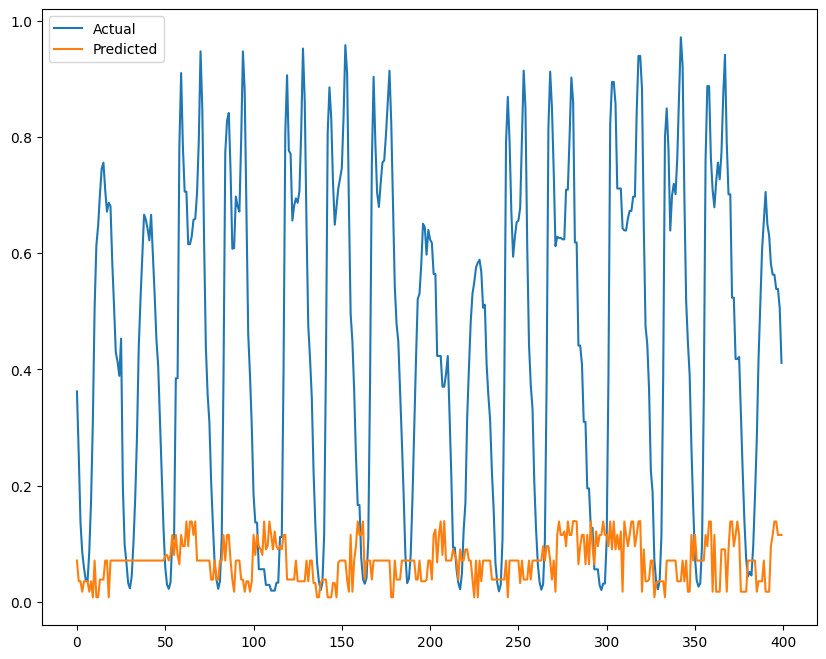

In [177]:
# Plot the predicted vs actual values for the test set.
plt.figure(figsize=(10,8))
plt.plot(y_test[:400], label='Actual')
plt.plot(y_pred[:400], label='Predicted')
plt.legend()
plt.show()

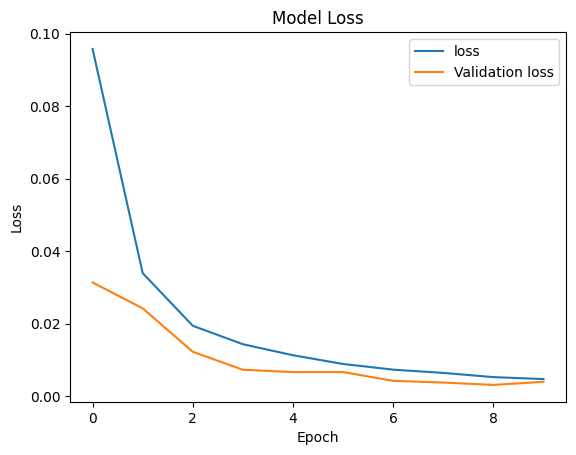

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'Validation loss'], loc='upper right')
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [157]:
model_LSTM.fit(X_train,y_train,epochs=10,validation_split=0.2,callbacks=early_stopping)

Epoch 1/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_los

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [181]:
y_pred_LSTM = model_LSTM.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [182]:
model_LSTM.save('model_LSTM.h5')

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [183]:
model_LSTM.evaluate(X_test,y_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1654 - mean_squared_error: 0.1654


[0.16046647727489471, 0.16046647727489471]

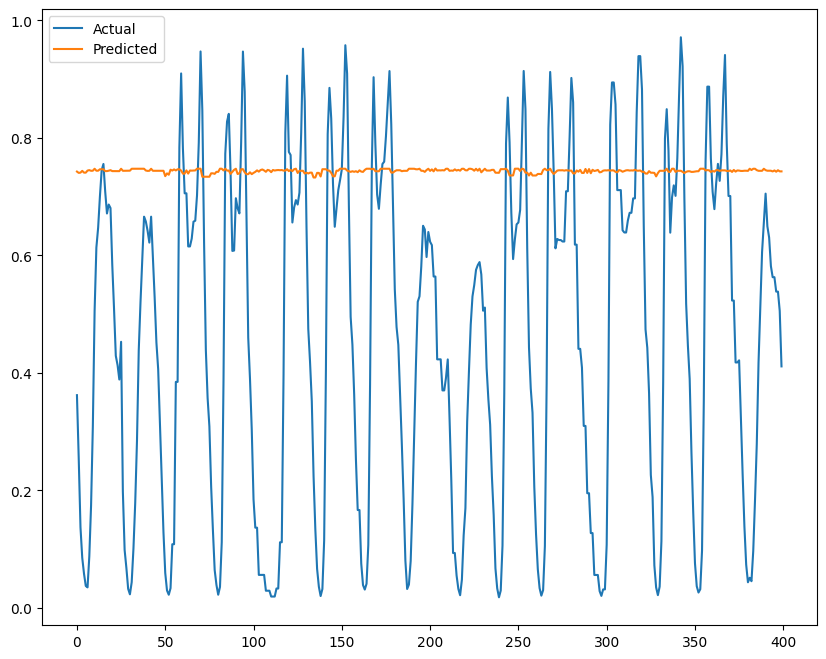

In [184]:
plt.figure(figsize=(10,8))
plt.plot(y_test[:400], label='Actual')
plt.plot(y_pred_LSTM[:400], label='Predicted')
plt.legend()
plt.show()

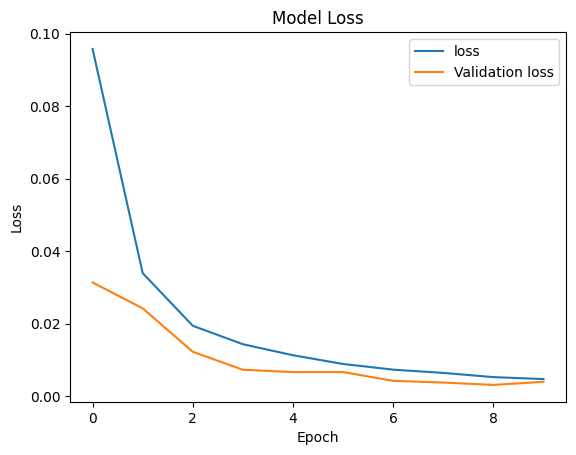

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'Validation loss'], loc='upper right')

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- we handling missing values by dopt it, since it's not more than 5% from the data, also we normalize the data after split it by using mimmax sclaer.

2-  I use Shift Method and Difference between traffic_volume
, and creat new feature like Day of the week: To capture weekly seasonality.
Month: To capture monthly trends.
Day of the year: Useful for modeling yearly seasonality.

3- I try more than one of Model Architecture to follow the best form.

